In [1]:
from chainopy import MarkovChain
import pydtmc
from chainopy import MarkovChainNeuralNetwork
from timeit import timeit
import matplotlib.pyplot as plt
import numpy as np

### Initialize a Dummy TPM for My Implementation and PyDTMC

In [2]:
# My Implementation
tpm =   [[0.3, 0.3, 0.4],
         [0.5,  0.5, 0 ],
         [ 0,   1,   0]]
        
x = MarkovChain(tpm, ["Rainy", "Sunny", "Cloudy"])

# PyDTMC

y = pydtmc.MarkovChain(tpm, ["Rainy", "Sunny", "Cloudy"])

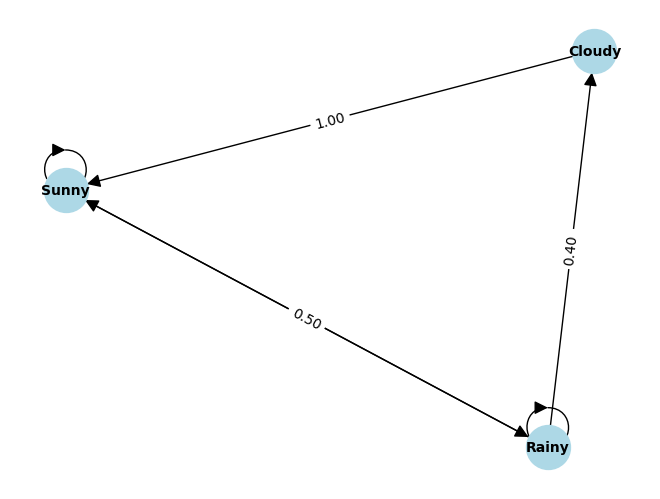

In [3]:
x.visualize_chain()

In [4]:
# My Implementation

print(x.is_absorbing())
print(x.is_aperiodic())
print(x.is_communicating("Rainy", "Cloudy"))
print(x.is_ergodic())
print(x.is_irreducible())
print(x.is_symmetric())
print(x.fundamental_matrix())
print(x.period())
print(x.is_recurrent("Rainy"))

False
True
True
True
True
False
None
1
False


In [5]:
# PyDTMC Implementation

print(y.is_absorbing)
print(y.is_aperiodic)
print(y.are_communicating(state1="Rainy", state2="Cloudy"))
print(y.is_ergodic)
print(y.is_irreducible)
print(y.is_symmetric)
print(y.fundamental_matrix)
print(y.period)
print(y.is_recurrent_state("Rainy"))

False
True
True
True
True
False
None
1
True


### Now let's compare the Runtime

In [6]:
%%timeit

# ChainoPy Implementation

x.is_absorbing()
x.is_aperiodic()
x.is_communicating("Rainy", "Cloudy")
x.is_ergodic()
x.is_irreducible()
x.is_symmetric()
x.fundamental_matrix()
x.period()

1.25 µs ± 30.6 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [7]:
%%timeit

# PyDTMC Implementation

y.is_absorbing
y.is_aperiodic
y.are_communicating(state1="Rainy", state2="Cloudy")
y.is_ergodic
y.is_irreducible
y.is_symmetric
y.fundamental_matrix
y.period

5.58 µs ± 90.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### ChainoPy is approx 5x Faster than PyDTMC

#### Now let's run a simulation using my implementation

In [21]:
%%timeit

sim = x.simulate(initial_state="Rainy", n_steps=500)

11.8 ms ± 1.1 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [22]:
%%timeit

sim_pydtmc = y.simulate(initial_state="Rainy", steps=500)

19.4 ms ± 1.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


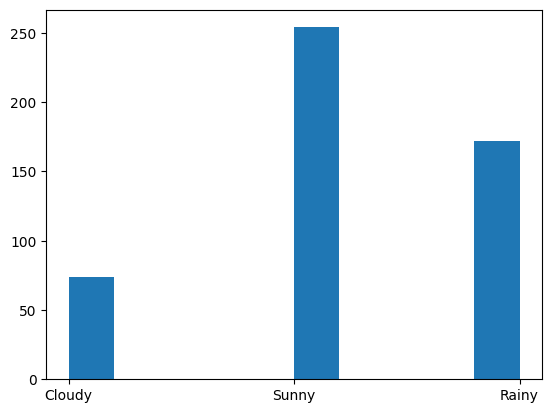

In [23]:
sim = x.simulate(initial_state="Rainy", n_steps=500)
plt.hist(sim)
plt.show()

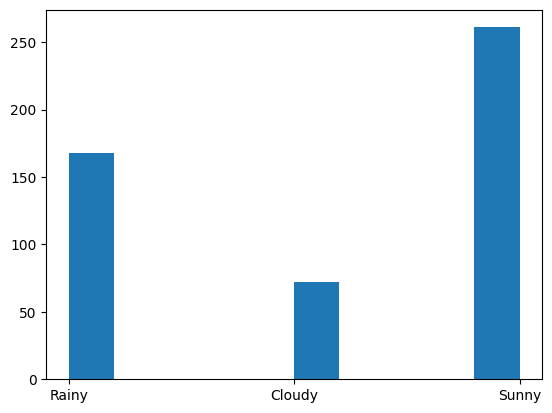

In [24]:
sim_pydtmc = y.simulate(initial_state="Rainy", steps=500)
plt.hist(sim_pydtmc)
plt.show()

### You can also use my Implementation to calculate distribution of the chain after `n` steps

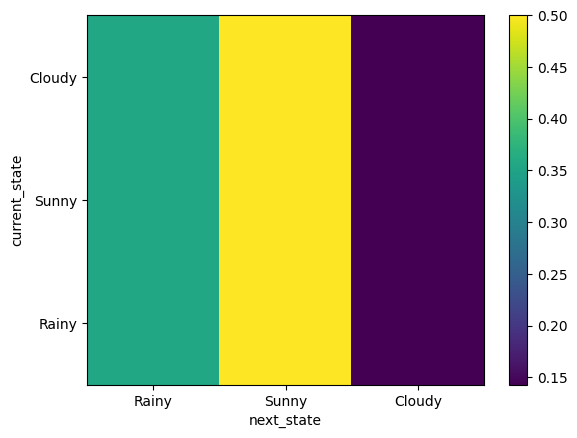

In [25]:
dist_after_500_steps = x.nstep_distribution(500)
x.tpm = dist_after_500_steps
x.visualize_transition_matrix()

### You can also save the Model as a JSON file 

In [26]:
x.save_model("first-save.json")

### If the matrix is TPM is sparse, with 40% or more elements equal/less than 0.0001, it will save the matrix in sparse format

In [27]:
t = np.zeros((3, 3))
t[0][0] = 1
t[1][2] = 1
t[2][1] = 1

In [28]:
t

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [29]:
x.tpm = t

In [30]:
x.save_model("second-save.json")

### You can also load the saved models as a new MarkovChain Object

In [31]:
new_object1 = MarkovChain()
new_object1.load_model("first-save.json")

In [32]:
new_object1

<Object of type MarkovChain with transition matrix [[0.35714286 0.5        0.14285714]
 [0.35714286 0.5        0.14285714]
 [0.35714286 0.5        0.14285714]] and states ['Rainy', 'Sunny', 'Cloudy']>

In [33]:
print(new_object1.tpm)
print(new_object1.states)
print(new_object1.eigendecom)
print(new_object1.eigenvalues)
print(new_object1.eigenvectors)


[[0.35714286 0.5        0.14285714]
 [0.35714286 0.5        0.14285714]
 [0.35714286 0.5        0.14285714]]
['Rainy', 'Sunny', 'Cloudy']
True
[ 1.        +0.j  0.33588989+0.j -0.53588989+0.j]
[[-0.57735027+0.j -0.67954784+0.j  0.27349606+0.j]
 [-0.57735027+0.j  0.26228594+0.j -0.4184597 +0.j]
 [-0.57735027+0.j  0.78086881+0.j  0.78086881+0.j]]


### You can also load a model containing TPM as a Sparse COO Matrix

In [34]:
new_object2 = MarkovChain()
new_object2.load_model("second-save.json")

In [35]:
new_object2

<Object of type MarkovChain with transition matrix [[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]] and states ['Rainy', 'Sunny', 'Cloudy']>

In [36]:
print(new_object2.tpm)
print(new_object2.states)
print(new_object2.eigendecom)
print(new_object2.eigenvalues)
print(new_object2.eigenvectors)

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
['Rainy', 'Sunny', 'Cloudy']
True
[ 1.        +0.j  0.33588989+0.j -0.53588989+0.j]
[[-0.57735027+0.j -0.67954784+0.j  0.27349606+0.j]
 [-0.57735027+0.j  0.26228594+0.j -0.4184597 +0.j]
 [-0.57735027+0.j  0.78086881+0.j  0.78086881+0.j]]


### Now we'll look at "How you can transform a Markov Chain to an equivalent Neural Network using ChainoPy's MarkovChainNeuralNetwork Class 

In [25]:
# Initialize a basic 2x2 Markov Chain

_markov_chain = MarkovChain(
    [[0, 1],
     [1, 0]],

    states=["Rainy", "Sunny"],
)

model = MarkovChainNeuralNetwork(_markov_chain, num_layers=5)
model.train_model(
                  num_samples=30_000, 
                  epochs=2_000, 
                  learning_rate=0.1, 
                  momentum=0.9, 
                  verbose=True, 
                  patience=500, 
                  factor=0.5
                )

Epoch: 0/2000, Loss: 0.6988
Epoch: 1/2000, Loss: 0.6986
Epoch: 2/2000, Loss: 0.6983
Epoch: 3/2000, Loss: 0.6978
Epoch: 4/2000, Loss: 0.6972
Epoch: 5/2000, Loss: 0.6966
Epoch: 6/2000, Loss: 0.6959
Epoch: 7/2000, Loss: 0.6953
Epoch: 8/2000, Loss: 0.6948
Epoch: 9/2000, Loss: 0.6943
Epoch: 10/2000, Loss: 0.6939
Epoch: 11/2000, Loss: 0.6936
Epoch: 12/2000, Loss: 0.6934
Epoch: 13/2000, Loss: 0.6932
Epoch: 14/2000, Loss: 0.6931
Epoch: 15/2000, Loss: 0.6931
Epoch: 16/2000, Loss: 0.6931
Epoch: 17/2000, Loss: 0.6931
Epoch: 18/2000, Loss: 0.6932
Epoch: 19/2000, Loss: 0.6932
Epoch: 20/2000, Loss: 0.6933
Epoch: 21/2000, Loss: 0.6933
Epoch: 22/2000, Loss: 0.6934
Epoch: 23/2000, Loss: 0.6934
Epoch: 24/2000, Loss: 0.6934
Epoch: 25/2000, Loss: 0.6934
Epoch: 26/2000, Loss: 0.6934
Epoch: 27/2000, Loss: 0.6934
Epoch: 28/2000, Loss: 0.6934
Epoch: 29/2000, Loss: 0.6934
Epoch: 30/2000, Loss: 0.6933
Epoch: 31/2000, Loss: 0.6933
Epoch: 32/2000, Loss: 0.6932
Epoch: 33/2000, Loss: 0.6932
Epoch: 34/2000, Loss: 0.

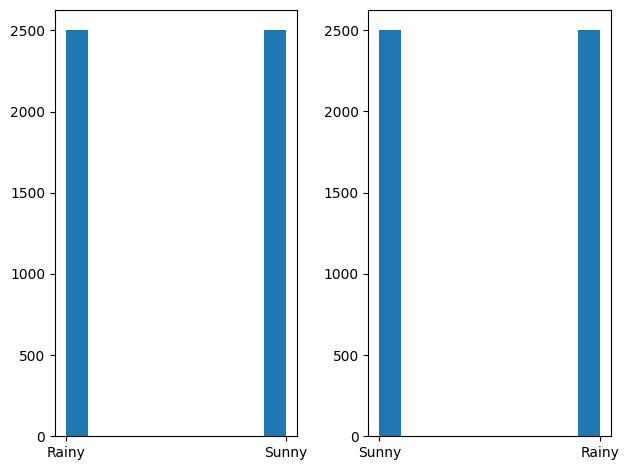

In [27]:
# Let's Simulate and Compare Random Walks generate by the Neural Networks and the Original `MarkovChain.simulate` method

nn_walk = model.simulate_random_walk("Rainy", 5000)
mc_walk = _markov_chain.simulate("Rainy", 5000)


fig, ax = plt.subplots(nrows=1, ncols=2)
ax1 = ax[0]
ax2 = ax[1]
# Right - Neural Network
ax1.hist(nn_walk)

# Left - `MarkovChain.simulate`
ax2.hist(mc_walk)

plt.tight_layout()
plt.show()

In [71]:
# Now let's work with a more complex Markov-Chain

# Initialize a basic 3x3 Markov Chain

_markov_chain = MarkovChain(
        [[0.3, 0.5, 0.2], 
         [0.1, 0.8, 0.1], 
         [0.3, 0.3, 0.4]],

        states=["Rainy", "Sunny", "Cloudy"],
)

model = MarkovChainNeuralNetwork(_markov_chain, num_layers=5)
model.train_model(
                  num_samples=30_000, 
                  epochs=2_000, 
                  learning_rate=0.1, 
                  momentum=0.9, 
                  verbose=True, 
                  patience=500, 
                  factor=0.5
                )

Epoch: 0/2000, Loss: 1.0987
Epoch: 1/2000, Loss: 1.0975
Epoch: 2/2000, Loss: 1.0951
Epoch: 3/2000, Loss: 1.0917
Epoch: 4/2000, Loss: 1.0874
Epoch: 5/2000, Loss: 1.0824
Epoch: 6/2000, Loss: 1.0766
Epoch: 7/2000, Loss: 1.0704
Epoch: 8/2000, Loss: 1.0638
Epoch: 9/2000, Loss: 1.0571
Epoch: 10/2000, Loss: 1.0504
Epoch: 11/2000, Loss: 1.0439
Epoch: 12/2000, Loss: 1.0378
Epoch: 13/2000, Loss: 1.0323
Epoch: 14/2000, Loss: 1.0276
Epoch: 15/2000, Loss: 1.0237
Epoch: 16/2000, Loss: 1.0205
Epoch: 17/2000, Loss: 1.0181
Epoch: 18/2000, Loss: 1.0163
Epoch: 19/2000, Loss: 1.0151
Epoch: 20/2000, Loss: 1.0143
Epoch: 21/2000, Loss: 1.0137
Epoch: 22/2000, Loss: 1.0134
Epoch: 23/2000, Loss: 1.0132
Epoch: 24/2000, Loss: 1.0132
Epoch: 25/2000, Loss: 1.0132
Epoch: 26/2000, Loss: 1.0132
Epoch: 27/2000, Loss: 1.0133
Epoch: 28/2000, Loss: 1.0134
Epoch: 29/2000, Loss: 1.0135
Epoch: 30/2000, Loss: 1.0135
Epoch: 31/2000, Loss: 1.0136
Epoch: 32/2000, Loss: 1.0137
Epoch: 33/2000, Loss: 1.0137
Epoch: 34/2000, Loss: 1.

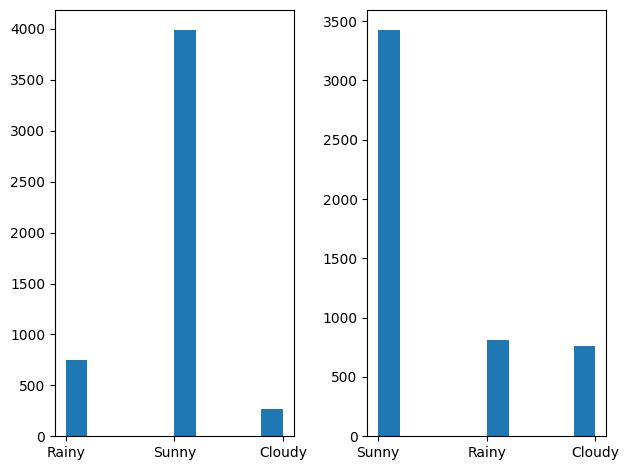

In [72]:
# Let's Simulate and Compare Random Walks generate 
# by the Neural Networks and the Original 
# `MarkovChain.simulate` method

nn_walk = model.simulate_random_walk("Rainy", 5000)
mc_walk = _markov_chain.simulate("Rainy", 5000)


fig, ax = plt.subplots(nrows=1, ncols=2)
ax1 = ax[0]
ax2 = ax[1]

# Right - Neural Network
ax1.hist(nn_walk)

# Left - `MarkovChain.simulate`
ax2.hist(mc_walk)

plt.tight_layout()
plt.show()

### NOTE:  A better Accuracy can be achieved using Complex Hyperparameter - Search Methods